In [1]:
import tensorflow as tf

import numpy as np
import os
import time

In [2]:
import tensorflow as tf
print(tf.__version__)  # Ensure that we're using "2.0.0-rc1"
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


2.0.0-rc1


In [3]:
import tensorflow.keras as k
import tensorflow_probability as tfp

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as metrics
import pdb
from pdb import set_trace as bp


### Note: 
This notebook builds on [this tensorflow tutorial](https://www.tensorflow.org/tutorials/text/text_generation). 

In [5]:
%ls

models/
nyc_stock_exchange.txt
principles_of_plitical_economy.txt
stock_exchange_from_within.txt
stock_exchange.txt
text_response_experiment_0.ipynb
text_response_experiment_LSTM_FC_GRU-2.ipynb
text_response_experiment_LSTM_FC_GRU-3.ipynb
text_response_experiment_LSTM_FC_GRU.ipynb


In [12]:
# text = open('principles_of_plitical_economy.txt', 'rb').read().decode(encoding='utf-8')
# text += open('stock_exchange.txt', 'rb').read().decode(encoding='utf-8')
# text += open('nyc_stock_exchange.txt', 'rb').read().decode(encoding='utf-8')
# text += open('stock_exchange_from_within.txt', 'rb').read().decode(encoding='utf-8')
# print(text[:250])
# print ('Length of text: {} characters'.format(len(text)))
data = pd.read_json('/media/l7/data_storage/datasets/quotes-dataset/quotes.json')
data

,Author,Category,Popularity,Quote,Tags
0,Dr. Seuss,life,0.155666,"Don't cry because it's over, smile because it ...","[attributed-no-source, cry, crying, experience..."
1,Dr. Seuss,happiness,0.155666,"Don't cry because it's over, smile because it ...","[attributed-no-source, cry, crying, experience..."
2,Marilyn Monroe,love,0.129122,"I'm selfish, impatient and a little insecure. ...","[attributed-no-source, best, life, love, mista..."
3,Marilyn Monroe,life,0.129122,"I'm selfish, impatient and a little insecure. ...","[attributed-no-source, best, life, love, mista..."
4,Marilyn Monroe,truth,0.129122,"I'm selfish, impatient and a little insecure. ...","[attributed-no-source, best, life, love, mista..."
5,Oscar Wilde,inspiration,0.113223,Be yourself; everyone else is already taken.,"[attributed-no-source, be-yourself, honesty, i..."
6,Albert Einstein,humor,0.103127,Two things are infinite: the universe and huma...,"[attributed-no-source, human-nature, humor, in..."
7,Albert Einstein,philosophy,0.103127,Two things are infinite: the universe and huma...,"[attributed-no-source, human-nature, humor, in..."
8,Albert Einstein,science,0.103127,Two things are infinite: the universe and huma...,"[attributed-no-source, human-nature, humor, in..."
9,Bernard M. Baruch,,0.101890,"Be who you are and say what you feel, because ...","[ataraxy, be-yourself, confidence, fitting-in,..."


In [13]:
data.loc[0]['Quote']
text = ""
for index, row in data.iterrows():
    text += row['Quote'] + ' \n '
# whole_text

In [14]:
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))
print(vocab)

551 unique characters
['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '«', '\xad', '®', '´', '¸', '»', '¾', '¿', 'À', 'Â', 'É', 'Î', 'Ó', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'î', 'ï', 'ñ', 'ó', 'ô', 'õ', 'ö', 'ù', 'ú', 'û', 'ü', 'ā', 'ă', 'ą', 'ć', 'č', 'ę', 'ğ', 'ī', 'İ', 'ı', 'ļ', 'ł', 'ō', 'œ', 'ś', 'ş', 'š', 'ţ', 'Ż', 'ż', 'ž', 'ƃ', 'Ɔ', 'ƒ', 'Ʀ', 'Ʒ', 'Ƹ', 'ǝ', 'ș', 'ț', 'ɐ', 'ə', 'ɟ', 'ɥ', 'ɪ', 'ɯ', 'ɹ', 'ʇ', 'ʍ', 'ʎ', 'ʞ', 'ʹ', 'ʺ', 'ʼ', 'ˈ', '˙', '̀', '́', '̪', '̵', '̿', '͇', 'Δ', 'Λ', 'Τ', 'ά', 'έ', 'ή', 'ί', 'α', 'β', 'γ'

Mapping the strings to a numerical representation

In [19]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [21]:
text_as_int.shape

(22250502,)

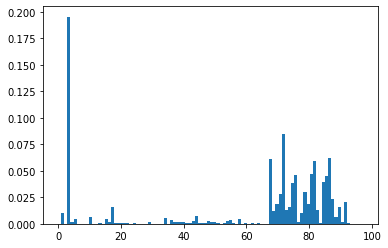

In [22]:
data = plt.hist(text_as_int, bins=len(vocab), density=True)
plt.show()

In [23]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\x08':   0,
  '\n':   1,
  '\x10':   2,
  ' ' :   3,
  '!' :   4,
  '"' :   5,
  '#' :   6,
  '$' :   7,
  '%' :   8,
  '&' :   9,
  "'" :  10,
  '(' :  11,
  ')' :  12,
  '*' :  13,
  '+' :  14,
  ',' :  15,
  '-' :  16,
  '.' :  17,
  '/' :  18,
  '0' :  19,
  ...
}


In [24]:
# Show how the first 13 characters from the text are mapped to integers
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

'[me narrating' ---- characters mapped to int ---- > [62 80 72  3 81 68 85 85 68 87 76 81 74]


In [25]:
# The maximum length sentence we want for a single input in characters
seq_length = 150
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

[
m
e
 
n


In [26]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'[me narrating a documentary about narrators] "I can\'t hear what they\'re saying cuz I\'m talking" \n Telling my daughter garlic is good for you. Good immu'
"ne system and keeps pests away.Ticks, mosquitos, vampires... men. \n I've been going through a really rough period at work this week It's my own fault f"
'or swapping my tampax for sand paper. \n If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak- \n Two guys walk into'
" a bar. The third guy ducks. \n Why can't Barbie get pregnant? Because Ken comes in a different box. Heyooooooo \n Why was the musician arrested? He got "
'in treble. \n Did you hear about the guy who blew his entire lottery winnings on a limousine? He had nothing left to chauffeur it. \n What do you do if a'


In [27]:
sequences

<BatchDataset shapes: (151,), types: tf.int64>

In [28]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [29]:
dataset

<MapDataset shapes: ((150,), (150,)), types: (tf.int64, tf.int64)>

In [30]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  '[me narrating a documentary about narrators] "I can\'t hear what they\'re saying cuz I\'m talking" \n Telling my daughter garlic is good for you. Good imm'
Target data: 'me narrating a documentary about narrators] "I can\'t hear what they\'re saying cuz I\'m talking" \n Telling my daughter garlic is good for you. Good immu'


In [31]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 62 ('[')
  expected output: 80 ('m')
Step    1
  input: 80 ('m')
  expected output: 72 ('e')
Step    2
  input: 72 ('e')
  expected output: 3 (' ')
Step    3
  input: 3 (' ')
  expected output: 81 ('n')
Step    4
  input: 81 ('n')
  expected output: 68 ('a')


In [32]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 100000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 150), (64, 150)), types: (tf.int64, tf.int64)>

# LSTM, FC, and GRU Model

The model below is an experiment to verify performance of an LSTM layer, a consecutive dimension reduction with FC, followed by a GRU. Finally, adding and merging the GRU with an FC layer. 

In [33]:
class LSTMCNNModel(k.Model):
    def __init__(self, 
                 vocab_size, 
                 embedding_dim, 
                 rnn_units, 
                 batch_size,
                fc_reduction_output_shape,
                ):
        super(LSTMCNNModel, self).__init__()
        self.embedding_0 = k.layers.Embedding(vocab_size, 
                                              embedding_dim,
                                              batch_input_shape=[batch_size, None])
        self.rnn_0 = k.layers.LSTM(rnn_units, 
                                  return_sequences=True,
                                  stateful=True,
                                  recurrent_initializer='glorot_uniform')
        self.rnn_1 = k.layers.GRU(rnn_units, 
                                  return_sequences=True,
                                  stateful=True,
                                  recurrent_initializer='glorot_uniform')
        self.fc_reduction_0 = k.layers.Dense(units=rnn_units,
                                          activation='relu')
        self.fc_reduction_1 = k.layers.Dense(units=embedding_dim,
                                          activation='relu')
        self.d_0 = k.layers.Dense(vocab_size, activation=None)
        

    def call(self, x, labels=None):
        x = self.embedding_0(x)
        x_lstm = self.rnn_0(x)
        x_fc_reduction = self.fc_reduction_0(x_lstm)
        x_fc_reduction = self.fc_reduction_1(x_fc_reduction)
        x_gru = self.rnn_1(x_fc_reduction)
        x = tf.add(x_lstm, x_gru)
        x = self.d_0(x)
        return x


    

In [34]:
def train_step(input_data,
               target_data,
               model,
               optimizer, 
               train_loss_container,):
    with tf.device('gpu'):
        with tf.GradientTape() as tape:
            predictions = model(input_data)
            # bp()
            loss = tf.reduce_mean(
                tf.keras.losses.sparse_categorical_crossentropy(target_data,
                                                                predictions, 
                                                                from_logits=True))
#             loss = tf.reduce_mean(
#                 tf.keras.losses.MSE(target_data, predictions))
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss_container.append(loss)
    return loss

In [35]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 150

# Number of RNN units
rnn_units = 1024

In [36]:
def generate_text(model, start_string, 
                  num_generate=1000):
    # Evaluation step (generating text using the learned model)

    # Number of characters to generate
    num_generate = num_generate

    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    # We must have the same batch size, as we stipulated in the model build. 
    input_data = np.zeros([BATCH_SIZE, len(input_eval)], dtype=np.int32)
    input_data[0] += input_eval
    # Empty string to store our results
    text_generated = []
    
    # Low temperatures results in more predictable text.
    # Higher temperatures results in more surprising text.
    # Experiment to find the best setting.
    temperature = 1.0

    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_data)[0]
        # using a categorical distribution to predict the word returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # We pass the predicted word as the next input to the model
        # along with the previous hidden state
        input_eval = [predicted_id]
        input_data = np.zeros([BATCH_SIZE, len(input_eval)], dtype=np.int32)
        input_data[0] += input_eval

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [37]:
with tf.device('gpu'):
    optimizer = k.optimizers.Adam(learning_rate=0.001, 
                              epsilon=1e-07)
    train_loss_container = []
    model = LSTMCNNModel(vocab_size, embedding_dim,
                         rnn_units, BATCH_SIZE,
                        fc_reduction_output_shape=[rnn_units, embedding_dim])
    EPOCHS = 5

In [ ]:
with tf.device('gpu'):
    EPOCHS = 10
    for epoch in range(EPOCHS):
        start_time = time.time()
        if epoch > 0:
            hidden = model.reset_states()


        for (batch_number, (input_data, target_data)) in enumerate(dataset):
            loss = train_step(input_data, 
                              target_data, 
                              model, 
                              optimizer,
                              train_loss_container)
            if batch_number % 100 == 0:
                template = 'Epoch {} Batch {} Loss {}'
                print(template.format(epoch+1, batch_number, loss))
                print(generate_text(model, start_string=u"What about economics ?", num_generate=150))
        model.save_weights('models/' + model.name + str(EPOCHS) + '_' + str(seq_length))
        print ('Epoch {} Loss {:.4f}'.format(epoch+1, loss))
        print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start_time))
model.save_weights('models/' + model.name + str(EPOCHS) + '_' + str(seq_length))

Epoch 1 Batch 0 Loss 4.584502696990967
What about economics ?FehDx7e_|~0m>z
Ze~&d"'GHRaBj<S.0fc%Lgf"n(fcuk1
GHC2CzJ*Jen?+g{^*+}bJNjQ^7Ec*o;5QvBKMi@!#kD%"j<,:.+,aQE%s7mr({K8!M$KCu09%'gyN<
{y?K,}HX}G{@('+f-EF
Epoch 1 Batch 100 Loss 2.586108446121216
What about economics ? Teshete. Ahw ders gretasbi hir is ank phaang cppotedate t as dakpeml. Wudfmoc ufwp 3ad 
 Au tonke fat ceoked, 
 White slkiw anl afeded anslasescnrine
Epoch 1 Batch 200 Loss 2.1820685863494873
What about economics ? 1~20 pase mto withat I... ... chanker, : Onfay Ind and 
 The dat deing ald they What?.. I bike the one som tripeds lifs beo" Ho foctoen. 
 Hint thenc
Epoch 1 Batch 300 Loss 1.883691668510437
What about economics ? Hown ans peeply strey tiplor bany."hing the Rarza bravilineeny. 
 OnT E gon a was fuying a lobs pam Yir. Berips: Ole iven told. 
 How me asnow dually
Epoch 1 Batch 400 Loss 1.7263736724853516
What about economics ? Bate fini duck, it's stipes! 
 An Mecies who said shaty 
 His world famu in a ressie

Epoch 2 Batch 1400 Loss 1.3334708213806152
What about economics ? A banana trouble enteir nickname 
 I reed an argumentary of Ise Dreaking 11 manurs designadek to bull the called Muslim Muscle. 
 Sah City He said th
Epoch 2 Batch 1500 Loss 1.336399793624878
What about economics ? Book A boo!! 
 What does a picture of movies storms of Larry Kores2? Finding it. 
 are yauth... She's keep so many night gree. 
 What for a big famil
Epoch 2 Batch 1600 Loss 1.2795398235321045
What about economics ? Arial coops 
 I would be to Zorce WO's concert? Check out them is they pat a torn 
 Women: First wife sits. It was so sofi rub the house walk into my
Epoch 2 Batch 1700 Loss 1.3225986957550049
What about economics ? Good squier to the others. 
 When the bus dress is calling in deteciating That I look for my cattle at command, who is this! 
 "Dangrask people just 
Epoch 2 Batch 1800 Loss 1.2724370956420898
What about economics ? Nummers have I livelwared of EHi! 
 Hey, got a tree, I'm sorry I'll lea

In [37]:
print(generate_text(model, start_string=u"What about economics ?", num_generate=500))


What about economics ? Of the question of
    to generation to send upon them; but those books under the min more than a
    limit to the laborer’s reason than usual, but first obtained as
    ttill to essencies at International value. But when the arts are
    thus bringn from their circumstances into
    commodities (in the case of a thing; and this between made by
    the case of slave-lands, ganners; and, as far as a medium is
    found that it does not bely equaled what is termed a matter
    with the ga


In [28]:
37000

37000